In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics, model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import csv

import pandas.io.sql as pd_sql

from collections import defaultdict

import os

import psycopg2 as pg
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from psycopg2 import OperationalError, errorcodes, errors

from tqdm import tqdm

import pprint as pp

In [2]:
# connection_args = {'host': '13.57.109.83', 
#                    'user':'ubuntu', 
#                    'password':'', 
#                    'port': 5432}

In [3]:
# connection_args['dbname'] = 'twitter_users'
# connection = pg.connect(**connection_args)


# connection.autocommit = True

# cursor = connection.cursor()


# # connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

In [4]:
# query = "SELECT gender, description, fav_number, link_color, name, retweet_count, sidebar_color, text, tweet_count, user_timezone FROM dl_dft LIMIT 5;"

# #run the query
# cursor.execute(query)

# #fetch the results
# results = list(cursor.fetchall())



In [5]:
# df = pd_sql.read_sql_query(query, connection)

In [6]:
# df = pd.DataFrame(df, columns=['gender', 'description', 'fav_number', 'link_color', 'name', 'retweet_count', 'sidebar_color', 'text', 'tweet_count', 'user_timezone'])

In [7]:
df = pd.read_csv('./gender.csv', index_col=[0], engine='python')
df

,gender,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count,user_timezone
0,male,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,Chennai
1,male,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,���It felt like they were my friends and I was...,7471,Eastern Time (US & Canada)
2,male,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...,5617,Belgrade
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,Pacific Time (US & Canada)
4,female,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair...",20036,Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...
11141,female,25. love my friends & family. the color pink. ...,436,B40B43,Cait89lovesTWD,0,FFFFFF,Beetlejuice is the perfect Halloween movie!!!!...,7004,Atlantic Time (Canada)
11142,male,"Typographer and typographic consultant, co-fou...",1762,990000,NickSherman,0,FFFFFF,@TrentWalton @oguzbilgic Spell it out in all-c...,9092,Eastern Time (US & Canada)
11143,male,Houston Chronicle Columnist - ken.hoffman@chr...,50,DD2E44,KenChronicle,0,0,Discovered it in England. It's how they eat fi...,3084,Central Time (US & Canada)
11144,brand,"When families go through divorce, it's helpful...",2,0084B4,MommyandDaddyar,0,C0DEED,For Stan and Lisa... has #Coffee Cup at https:...,105864,Mountain Time (US & Canada)


In [8]:
# #drop unwanted columns

df.drop(['user_timezone', 'link_color', 'name'], axis=1, inplace=True)

In [9]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11146 entries, 0 to 11145
Data columns (total 7 columns):
gender           11146 non-null object
description      11146 non-null object
fav_number       11146 non-null int64
retweet_count    11146 non-null int64
sidebar_color    11146 non-null object
text             11146 non-null object
tweet_count      11146 non-null int64
dtypes: int64(3), object(4)
memory usage: 696.6+ KB


In [10]:
#function that cleans the text. 

def get_clean_text (s):
    '''clean up text. remove punctuation and random symbols
    '''
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W', ' ', s)    
    s = re.sub('\W\s', '', s) 
    s = re.sub('\s+', ' ', s)
             
                    
    return s


In [11]:
#Clean text and description. Remove NaN from rows
df['clean_text'] = [get_clean_text(s) for s in df['text']]
df['clean_des'] = [get_clean_text(s) for s in df['description']]
df = df.dropna(subset=['gender', 'clean_text', 'clean_des'])


In [12]:
#drop these columns since we made new columns with cleaned text
df.drop(['text', 'description'], axis = 1, inplace=True)

In [13]:
df.shape

(11146, 7)

In [14]:
''' Use Bag of Words. Run count vector on text features and return a array. 
    Set stop word to english. 
    Set max_df to 0.8: if a word occurs in more than 80% of corpus then remove. -useless words like "the", "a"..etc 
    Set max_features to 100: We only want to top words used, since there are >20000 unique words. 
    '''


count_vectorizer = CountVectorizer(ngram_range=(1, 1),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.8, max_features = 100)

df1 = count_vectorizer.fit_transform(df['clean_text'])
print(df1.toarray())
print(len(df1.toarray()))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
11146


AttributeError: 'CountVectorizer' object has no attribute 'count_vectorizer'

In [15]:
# Using tokenized words to make features and make into a dataframe

feature_names = count_vectorizer.get_feature_names()
df_countvec = pd.DataFrame(df1.toarray(), columns=feature_names)

print(df_countvec)

       amas  bad  best  better  big  black  business  check  come  day  ...  \
0         0    0     0       0    0      0         0      0     0    0  ...   
1         0    0     0       0    0      0         0      0     0    0  ...   
2         0    0     0       0    0      0         0      0     0    0  ...   
3         0    0     0       0    0      0         0      0     0    0  ...   
4         0    0     0       0    0      0         0      0     0    0  ...   
...     ...  ...   ...     ...  ...    ...       ...    ...   ...  ...  ...   
11141     0    0     0       0    0      0         0      0     0    0  ...   
11142     0    0     0       0    0      0         0      0     0    0  ...   
11143     0    0     0       0    0      0         0      0     0    0  ...   
11144     0    0     0       0    0      0         0      0     0    0  ...   
11145     0    0     1       0    0      0         0      0     0    0  ...   

       want  watch  way  week  went  win  work  wor

In [16]:
#Merge the dataframe with words as features into the original dataframe.

df_merge = df.merge(df_countvec, left_index=True, right_index= True)

In [17]:
# Check if the columns add up. We added 100 new features to the original 7 features. 

df_merge.shape

(11146, 107)

In [18]:
#check what types of labels there are in gender

df_merge.gender.unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

In [19]:
#remove unwanted labels in dependent variable

df_merge = df_merge[df_merge.gender != 'unknown']
df_merge = df_merge[df_merge.gender != 'brand']

In [20]:
#check for null numbers

df_merge.isnull().sum()

gender           0
fav_number       0
retweet_count    0
sidebar_color    0
tweet_count      0
                ..
win              0
work             0
world            0
year             0
youtube          0
Length: 107, dtype: int64

In [21]:
# Now we only have male and female as our classifications

df_merge.gender.unique()

array(['male', 'female'], dtype=object)

In [22]:
# chage gender of male and female to 1 and 0

df_merge.gender = df_merge.gender.replace({'male': 1, 'female': 0})

In [23]:
#convert hexadecimal color to string. 

df_merge['sidebar_color'] = df_merge.sidebar_color.str[0]

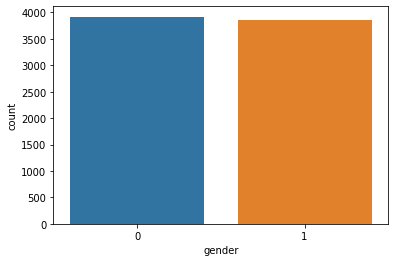

In [24]:
#check if data is balanced. Looks like its a pretty even split between male and female. 

sns.countplot(x='gender', data= df_merge)

In [25]:
#set dummy variables

dummies = pd.get_dummies(df_merge[['sidebar_color']], drop_first=True)

df_merge = pd.concat([df_merge.drop(['sidebar_color'], axis=1), dummies], axis = 1)

In [26]:
# df_merge.corr()
# plt.figure(figsize=(10,7))
# sns.heatmap(df_merge.corr(), annot=True, cmap='viridis')
# sns.distplot(df_merge['gender'], kde=False, bins= 40)

In [27]:
#Set X and Y for training and testing. We don't need the text columns since we made words from text into features

X = df_merge.drop(['gender', 'clean_des','clean_text'], axis=1).values
y = df_merge['gender'].values

In [28]:
#Train, test, split data. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [29]:
# Scale the features to make it easier to work with

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train = mm_scaler.transform(X_train)
X_test = mm_scaler.transform(X_test)

## Decision Tree ##

0.5816195372750642


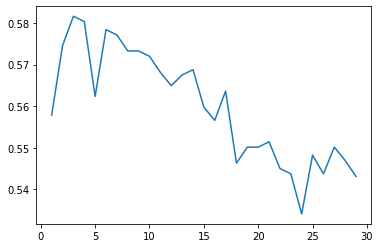

In [30]:
# Decision Tree model. Check which max depth is the best by using a loop that checks 1-30 depth

scores = []
for i in range(1, 30):
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_test, y_test))
plt.plot(range(1,30), scores)
print(max(scores))

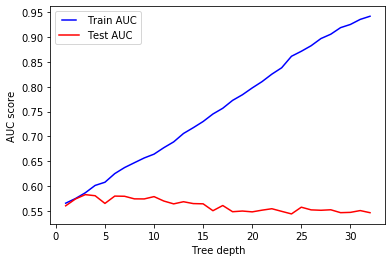

In [31]:
# We can compare the AUC score for our training and test data. It shows that the training will overfit and can't 
# generalize the data. 
# took function from: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d


max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = tree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [32]:
# looks like max depth of 3 gave us the best predictive power in the training data. We will use max depth 3 to run test cases

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)
print("The score for Decision Tree Classifier is")
print("Training: {:6.2f}%".format(100*tree.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*tree.score(X_test, y_test)))

y_predict = tree.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for Decision Tree Classifier is
Training:  58.73%
Test set:  58.16%
Default threshold:
Precision: 0.6055,   Recall: 0.5226
The F1 score is: 0.5610


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

ROC AUC score =  0.5933929516001057


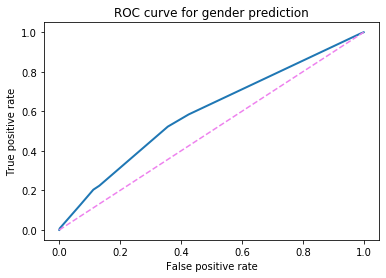

In [34]:
# Plot the ROC curve to see how the model is doing. 

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

## Random Forest

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

0.5886889460154242


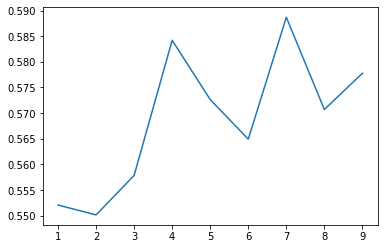

In [35]:
#Determine what depth to use for Random Forest

scores = []
for i in range(1, 10):
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.plot(range(1,10), scores)
print(max(scores))

In [36]:
# Looks like max depth of 2 might be the best. 

rf = RandomForestClassifier(max_depth = 3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print("The score for Decision Tree Classifier is")
print("Training: {:6.2f}%".format(100*rf.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test, y_test)))

y_predict = rf.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for Decision Tree Classifier is
Training:  59.84%
Test set:  55.53%
Default threshold:
Precision: 0.5844,   Recall: 0.4523
The F1 score is: 0.5099


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

ROC AUC score =  0.5934607246760116


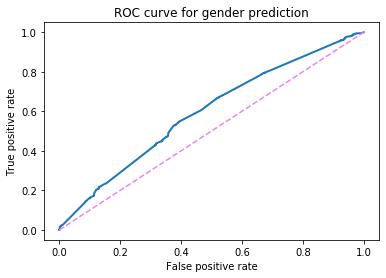

In [38]:
#Plot ROC curve

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

## KNN ##

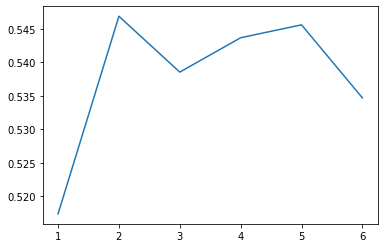

In [39]:
#KNN model. check for the best number of neighbors from 1-7. 

neighbors = []
for k in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    neighbors.append(knn.score(X_test, y_test))
    
knn_list = list(range(1, 7))
plt.plot(knn_list, neighbors)

In [40]:
#Looks like K=2 is the best. 

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

print("The score for KNN is:")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

y_predict = knn.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for KNN is:
Training:  76.86%
Test set:  54.69%
Default threshold:
Precision: 0.6176,   Recall: 0.3003
The F1 score is: 0.4041


In [41]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

ROC AUC score =  0.550616569690558


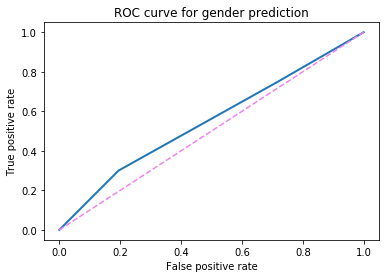

In [42]:
#Plot ROC curve

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

## SVM

In [43]:
# scores = []
# for i in (np.linspace(0.01,1,10)):
#     classifier = SVC(kernel = 'linear', C = i)
#     classifier.fit(X_train,y_train) 
#     scores.append(classifier.score(X_test,y_test)) 
# plt.plot(np.linspace(0.01,1,10),scores) 

The cells below will run, but it will take a long time. So I commented them out.

In [44]:
# scores=[]
# for i in (np.linspace(0.01,1,10)):
#     classifier = SVC(kernel = 'rbf', gamma=i, C = i)
#     classifier.fit(X_train,y_train) 
#     scores.append(classifier.score(X_test,y_test)) 
# plt.plot(np.linspace(0.01,1,10),scores)

In [45]:
# classifier = SVC(kernel = 'linear', gamma=0.6, C = 0.6, probability=True)
# classifier.fit(X_train,y_train) 
# classifier.score(X_test,y_test)

# print("The score for SVC is:")
# print("Training: {:6.2f}%".format(100*classifier.score(X_train, y_train)))
# print("Test set: {:6.2f}%".format(100*classifier.score(X_test, y_test)))

# y_predict = classifier.predict(X_test)
# print("Default threshold:")
# print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
#                                                      recall_score(y_test, y_predict)))
# print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))


In [46]:
# roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

In [47]:
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
# plt.plot(fpr, tpr,lw=2)
# plt.plot([0,1],[0,1],c='violet',ls='--')
# plt.xlim([-0.05,1.05])
# plt.ylim([-0.05,1.05])


# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for gender prediction');
# print("ROC AUC score = ", roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1]))

## Logistic Regression

In [48]:
logit = LogisticRegression(C = 0.1)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

y_predict = logit.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for logistic regression is
Training:  59.86%
Test set:  55.33%
Default threshold:
Precision: 0.5881,   Recall: 0.4234
The F1 score is: 0.4923


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])

ROC AUC score =  0.597178325839725


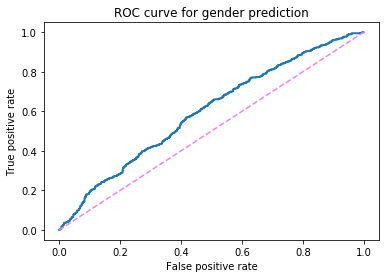

In [50]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

## Multinominal Naieve Bayes

In [51]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

print("The score for Naive  is")
print("Training: {:6.2f}%".format(100*nb.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*nb.score(X_test, y_test)))

y_predict = nb.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for Naive  is
Training:  59.76%
Test set:  55.40%
Default threshold:
Precision: 0.5828,   Recall: 0.4510
The F1 score is: 0.5085


In [52]:
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

ROC AUC score =  0.5960972626289343


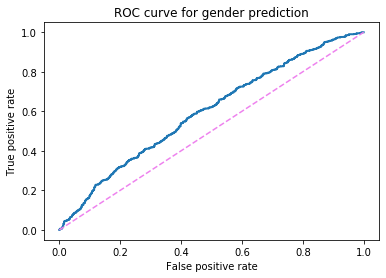

In [53]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(X_test)[:,1]))

## Gaussian Naive Bayes

In [54]:

nb_g = GaussianNB()
nb_g.fit(X_train, y_train)
nb_g.score(X_test, y_test)

print("The score for Gaussian Naive Bayes is")
print("Training: {:6.2f}%".format(100*nb_g.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*nb_g.score(X_test, y_test)))

y_predict = nb_g.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for Gaussian Naive Bayes is
Training:  57.83%
Test set:  55.78%
Default threshold:
Precision: 0.5582,   Recall: 0.6508
The F1 score is: 0.6009


In [55]:
fpr, tpr, thresholds = roc_curve(y_test, nb_g.predict_proba(X_test)[:,1])

ROC AUC score =  0.5800226461253637


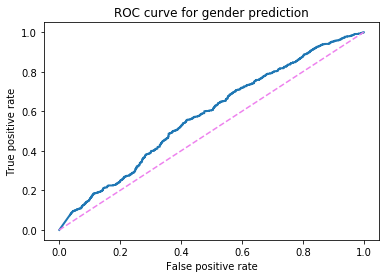

In [56]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, nb_g.predict_proba(X_test)[:,1]))

## Bernoulli Naive Bayes

In [57]:
nb_b = BernoulliNB()
nb_b.fit(X_train,y_train)
nb_b.score(X_test,y_test)

print("The score for Gaussian Naive Bayes is")
print("Training: {:6.2f}%".format(100*nb_b.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*nb_b.score(X_test, y_test)))

y_predict = nb_b.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for Gaussian Naive Bayes is
Training:  59.37%
Test set:  56.81%
Default threshold:
Precision: 0.5831,   Recall: 0.5465
The F1 score is: 0.5642


In [58]:
fpr, tpr, thresholds = roc_curve(y_test, nb_g.predict_proba(X_test)[:,1])

ROC AUC score =  0.5800226461253637


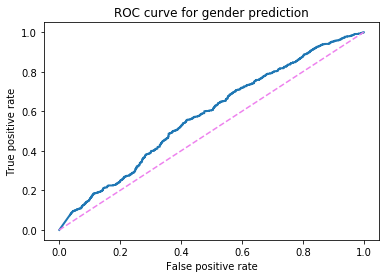

In [59]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, nb_g.predict_proba(X_test)[:,1]))

Search for best paramaters and CV

In [60]:
#code from Kevin Chiv

classifiers = {'KNN': KNeighborsClassifier(), 
               'LR': LogisticRegression(max_iter = 10000, solver ='saga'),
               'DT': DecisionTreeClassifier(),
               'RF': RandomForestClassifier(max_depth = 3), 
    
              }

param_dict = {'KNN': {'KNN__n_neighbors': [3, 5, 7]}, 
              'LR': {'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
              'DT': {'DT__max_depth': [3, 5, 7]},
              'RF': {'RF__n_estimators': [100, 250, 500, 1000], 
                     'RF__max_depth': [3, 4, 5]}
              
             }

results_dict = {}


#we use the stratify version of k-fold to keep the class imbalance ratio
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for classifier_name, classifier in classifiers.items():
    
    #sampling is the first step, then classifying
    #'sampling' is None because no sampling was best
    #if 'sampling' is not None, change n_jobs in GridSearchCV to 1
    steps = [('sampling', None),
             (classifier_name, classifier)]
    
    model = Pipeline(steps)
    
    #fetch the parameters from param_dict
    params = param_dict[classifier_name]
    
    #scoring is changed to roc_auc score
    #we specify return_train_score = True to 
    #compare train and test to check for overfitting
    #if 'sampling' is not None, change n_jobs in GridSearchCV to 1
    #this is to avoid conflict among the workers 
    #due to sampling and modeling the training set, which changes across folds
    grid = GridSearchCV(model, params, cv = kf, return_train_score = True,
                        n_jobs = -1, scoring = 'roc_auc', verbose = True)

    grid.fit(X_train, y_train)

    results = grid.cv_results_
    
    scores = list(zip(results['params'], results['mean_train_score'], results['mean_test_score']))
    scores = sorted(scores, key = lambda x:x[2], reverse = True)

    results_dict[classifier_name] = scores

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.8s finished


In [61]:
pp.pprint(results_dict)

{'DT': [({'DT__max_depth': 7}, 0.6826191788534055, 0.6176521658733269),
        ({'DT__max_depth': 5}, 0.6443961218927121, 0.6059540220942994),
        ({'DT__max_depth': 3}, 0.6077188026915827, 0.5874903488141249)],
 'KNN': [({'KNN__n_neighbors': 7}, 0.7489985508129606, 0.5734799341302868),
         ({'KNN__n_neighbors': 5}, 0.777237741891464, 0.5699842071995236),
         ({'KNN__n_neighbors': 3}, 0.835878014902397, 0.5538382295589716)],
 'LR': [({'LR__C': 0.1}, 0.6408749892326377, 0.6122517400928018),
        ({'LR__C': 1}, 0.6550731621711171, 0.6118662455608863),
        ({'LR__C': 10}, 0.6575982255890364, 0.6102878866930657),
        ({'LR__C': 100}, 0.6579552019486898, 0.6101200330946587),
        ({'LR__C': 1000}, 0.6580435333083396, 0.6100694310597862),
        ({'LR__C': 0.01}, 0.6155099431738175, 0.6015173940647623),
        ({'LR__C': 0.001}, 0.6055947455338537, 0.5942038207984466)],
 'RF': [({'RF__max_depth': 5, 'RF__n_estimators': 1000},
         0.688409446297438,
       

In [62]:
#plot all the ROC curves together 
#Code from Kevin Chiv

def plot_roc_curves(classifiers, X_train, y_train, X_test, y_test, sampler = None):
    """
        Function for plotting roc curves of classifiers for comparison
        
        :param classifiers: dictionary of classifiers
        :param sampler: sampling method to use e.g. SMOTE
        
        :returns fpr: an array of false positive rate values from roc_curve
        :returns tpr: an array of true positive rate values from roc_curve
        :returns thresholds: an array of threshold values from roc_curve
        :returns roc_auc: roc_auc scores for each classifier in classifiers
    """

    fpr, tpr, thresholds = {}, {}, {}
    roc_auc = {}


    for classifier_name, classifier in classifiers.items():

        #set n_jobs = -1 for faster performance
        classifier = classifier.set_params(n_jobs = -1)

        if sampler:
            sampler.set_params(random_state = 42, n_jobs = -1)

        steps = [('sampling', sampler),
                 (classifier_name, classifier)]

        model = Pipeline(steps)

        model.fit(X_train, y_train)

        y_proba = model.predict_proba(X_test)[:,1]

        fpr[classifier_name], tpr[classifier_name], thresholds[classifier_name] = roc_curve(y_test, y_proba)

        roc_auc[classifier_name] = round(auc(fpr[classifier_name], tpr[classifier_name]), 3)

        print(classifier_name + ' roc_auc score: ' + str(roc_auc[classifier_name]))


    plt.figure(figsize=(8, 8))

    for classifier_name, classifier in classifiers.items():
        sns.lineplot(fpr[classifier_name], tpr[classifier_name], err_style = None);

    midline_points = np.arange(0, 1.05, 0.05) 

    plt.plot(midline_points, midline_points, linestyle ='--', color = 'black');
    plt.title("ROC Curves for Different Classification Models", y =1.05, fontsize = 16);
    plt.xlabel('FPR', fontsize = 12, x = 1.05);
    plt.ylabel('TPR', fontsize = 12, rotation =0, y = 1.05);
    plt.legend(list(zip(classifiers.keys(), roc_auc.values())));

    return fpr, tpr, thresholds, roc_auc

KNN roc_auc score: 0.554
LR roc_auc score: 0.597
RF roc_auc score: 0.612
Ensemble roc_auc score: 0.581


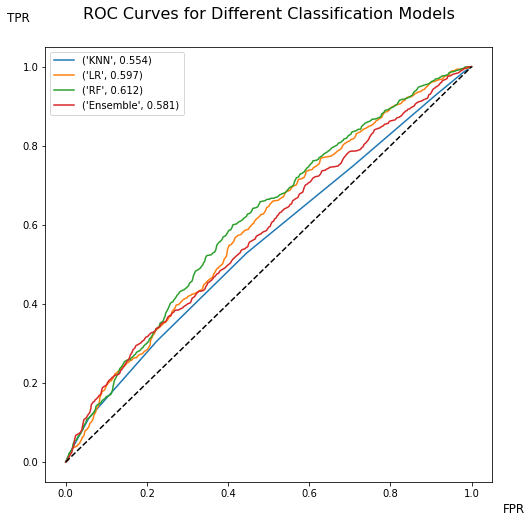

In [63]:
logit = LogisticRegression(C = 0.1, max_iter = 10000, random_state = 42,
                        solver ='saga', class_weight = 'balanced')

knn = KNeighborsClassifier(n_neighbors = 7)

rf = RandomForestClassifier(max_depth = 3, n_estimators = 500, class_weight = 'balanced')

tree = DecisionTreeClassifier(max_depth = 3, random_state=42)


classifiers = {'KNN': knn, 
               'LR': logit, 
               'RF': rf,
               'Ensemble': VotingClassifier(estimators=[('lr', logit), ('rf', rf), ('knn', knn)],
                                            voting='soft', weights=[1, 1, 1])
              }

fpr, tpr, thresholds, roc_auc = plot_roc_curves(classifiers,  
                                                X_train, y_train, X_test, y_test)

Seems like Random Forest and Logistic Regression have the best ROC/AUC score. We will tune this model more to see if we can increase the score. 

In [64]:
# perhaps if we include text and description together we will get better score. 

df['text_des'] = df['clean_text'].str.cat(df['clean_des'], sep= ' ')

Repeating the same steps as the begining except using text and description added together


In [65]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.8, max_features = 100)

df2 = count_vectorizer.fit_transform(df['text_des'])
print(df2.toarray())
print(len(df2.toarray()))



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
11146


In [66]:
feature_names = count_vectorizer.get_feature_names()
df_countvec2 = pd.DataFrame(df2.toarray(), columns=feature_names)

print(df_countvec2)



       account  artist  best  better  big  business  check  com  come  day  \
0            0       0     0       0    0         0      0    0     0    0   
1            0       0     0       0    0         0      0    0     0    0   
2            0       0     0       0    0         0      0    0     0    0   
3            0       0     0       0    0         0      0    0     0    0   
4            0       0     0       0    0         0      0    0     0    0   
...        ...     ...   ...     ...  ...       ...    ...  ...   ...  ...   
11141        0       0     0       0    0         0      0    0     0    0   
11142        0       0     0       0    0         0      0    0     0    0   
11143        0       0     0       0    0         0      0    1     0    0   
11144        0       0     0       0    0         0      0    0     0    0   
11145        0       0     1       0    0         0      0    0     0    0   

       ...  use  ve  video  want  way  week  work  world  year 

In [67]:
df_merge2 = df.merge(df_countvec2, left_index=True, right_index= True)

In [69]:
df_merge2['sidebar_color'] = df_merge2.sidebar_color.str[0]

In [70]:
dummies = pd.get_dummies(df_merge2[['sidebar_color']], drop_first=True)

df_merge2 = pd.concat([df_merge2.drop(['sidebar_color'], axis=1), dummies], axis = 1)

In [71]:
df_merge2 = df_merge2[df_merge2.gender != 'unknown']
df_merge2 = df_merge2[df_merge2.gender != 'brand']

In [73]:
df_merge2.gender.unique()

array(['male', 'female'], dtype=object)

In [74]:
df_merge2.gender = df_merge2.gender.replace({'male': 1, 'female': 0})

In [75]:
X = df_merge2.drop(['gender', 'clean_des','clean_text', 'text_des'], axis=1).values
y = df_merge2['gender'].values

In [76]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train = mm_scaler.transform(X_train)
X_test = mm_scaler.transform(X_test)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Logistic Regression

In [78]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

y_predict = logit.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for logistic regression is
Training:  56.48%
Test set:  55.33%
Default threshold:
Precision: 0.5691,   Recall: 0.5226
The F1 score is: 0.5449


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score =  0.5678722560169267


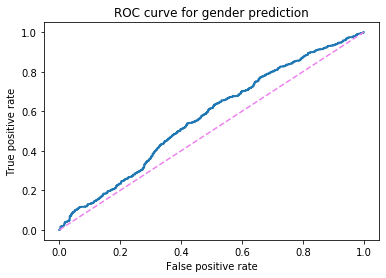

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

In [84]:
# Adjusting the threshold to 0.06. 


logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

y_predict = (logit.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))



The score for logistic regression is
Training:  56.48%
Test set:  55.33%
Threshold of 0.06:
Precision: 0.5116,   Recall: 1.0000
The F1 score is: 0.6769


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


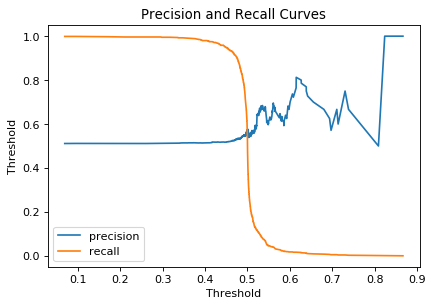

In [92]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, logit.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.ylabel('Threshold');
plt.title('Precision and Recall Curves');

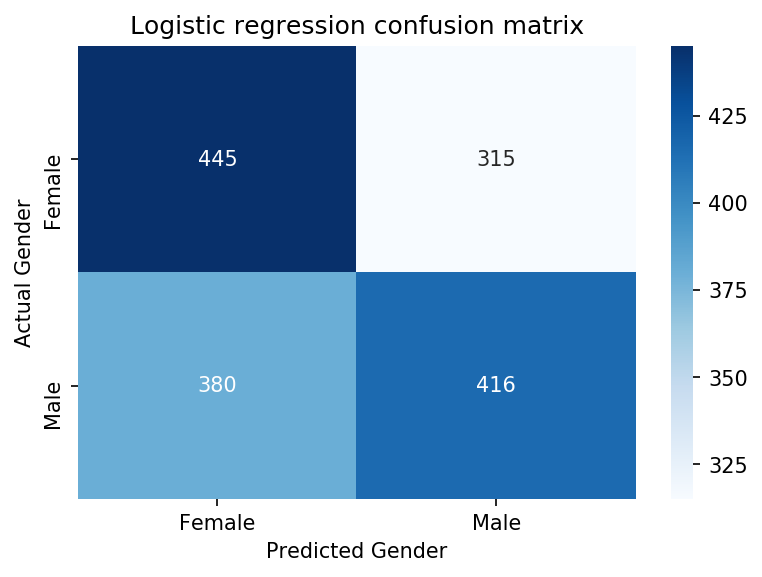

In [125]:
logit_confusion = confusion_matrix(y_test, logit.predict(X_test))
plt.figure(dpi=150)

ax = plt.subplot()
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, fmt='g')

ax.xaxis.set_ticklabels(['Female', 'Male']);
ax.yaxis.set_ticklabels(['Female', 'Male'])


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Gender')
plt.ylabel('Actual Gender')
plt.title('Logistic regression confusion matrix');



## Random Forest

In [88]:
rf = RandomForestClassifier(max_depth = 3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5681233933161953

In [89]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*rf.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test, y_test)))

y_predict = rf.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("The F1 score is: {:6.4f}".format(f1_score(y_test, y_predict)))

The score for logistic regression is
Training:  59.68%
Test set:  56.81%
Default threshold:
Precision: 0.6058,   Recall: 0.4460
The F1 score is: 0.5137


ROC AUC score =  0.6126900952129066


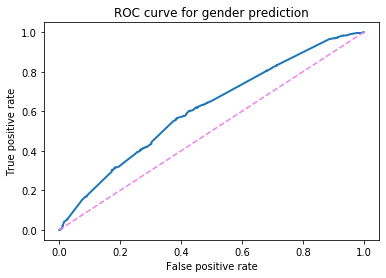

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for gender prediction');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))